# Task 2 : Building the baseline model

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Dropout, Input, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from funcs_Task1 import training_data_Pipeline, test_validation_data_Pipeline

In [4]:
# constants
img_height = img_width = 128
batch_size = 32
img_size = (img_height, img_width)

train_dir = 'covid xray/train'
val_dir = 'covid xray/val'
test_dir = 'covid xray/test'

epochs = 30

### 1. Set up the classification

In [5]:

# Set random seeds for reproducibility
np.random.seed(123)  
tf.random.set_seed(123) 

# evaluation metrics
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),  # Accuracy metric
    tf.keras.metrics.AUC(name='auc')  # Area Under Curve metric
]

### 2. Build initial model


In [6]:
# Step 2: Build Initial Model
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

# Convolutional Part
model.add(layers.Input(shape=(128, 128, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling
model.add(layers.BatchNormalization())                        # Normalization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))      # Second conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling

# Fully Connected Part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))          # Dense layer
model.add(layers.Dropout(0.5))                                # Dropout layer

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))             # Binary classification

# Compile model
#model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,049 (14.14 MB)

 Trainable params: 3,705,985 (14.14 MB)

 Non-trainable params: 64 (256.00 B)

### 3. Train your model

In [23]:
# Use existing data pipelines
train_data_gen = training_data_Pipeline(batch_size, img_size, train_dir)
val_data_gen = test_validation_data_Pipeline(batch_size, img_size, test_dir=val_dir, train_dir=train_dir)

# Get sample counts (if not already defined)
total_train = train_data_gen.samples
total_val = val_data_gen.samples

# Compile the model (keep your existing METRICS)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=METRICS
)

# Train the model
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    verbose=1
)




Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30


c:\Users\Marcin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.7150 - auc: 0.7828 - loss: 0.3548 - val_accuracy: 0.8100 - val_auc: 0.9144 - val_loss: 0.3893
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step - accuracy: 0.8435 - auc: 0.9312 - loss: 0.3201 - val_accuracy: 0.7950 - val_auc: 0.9066 - val_loss: 0.4102
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 323ms/step - accuracy: 0.8401 - auc: 0.9206 - loss: 0.3347 - val_accuracy: 0.7800 - val_auc: 0.9112 - val_loss: 0.4795
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.8568 - auc: 0.9342 - loss: 0.3186 - val_accuracy: 0.7950 - val_auc: 0.9060 - val_loss: 0.3854
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 341ms/step - accuracy: 0.8563 - auc: 0.9409 - loss: 0.2986 - val_accuracy: 0.7975 - val_auc: 0.9107 - val_loss: 0.4836
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 333ms/step - accuracy: 0.8172 - auc: 0.9270 - loss: 0.3258 - val_accuracy: 0.8125 - val_auc: 0.9252 - val_loss: 0.3713
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 320

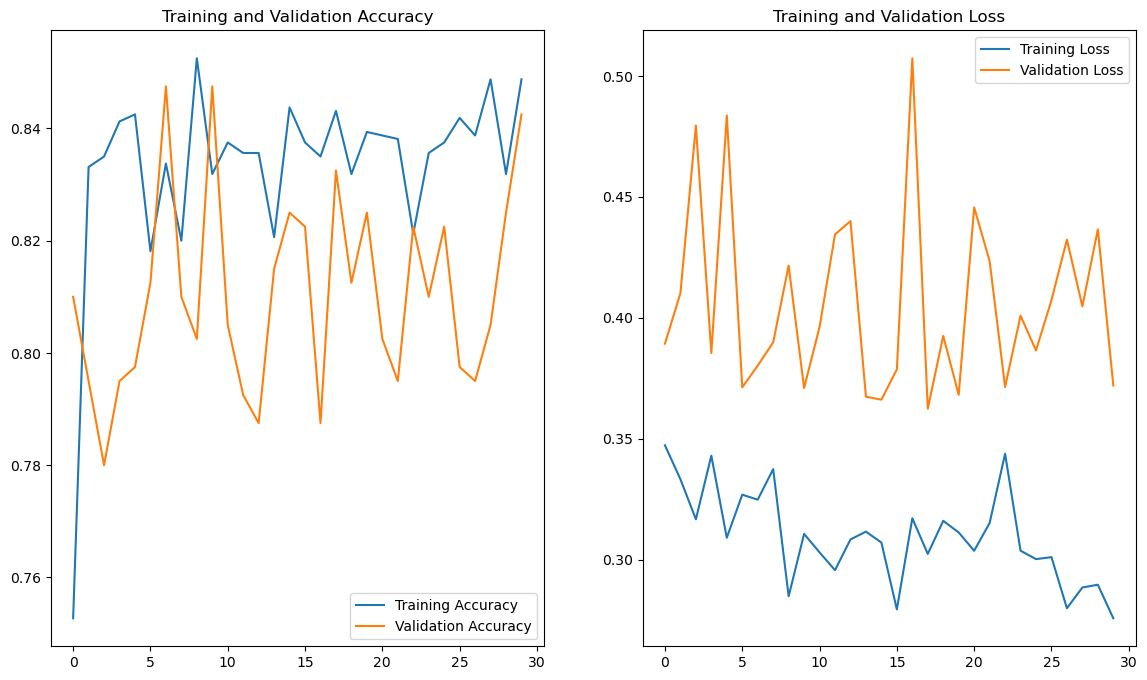

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 4. Hyperparameter tuning

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [21]:
!pip install keras-tuner --upgrade


     -------------------------------------- 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt

def build_model(hp):

    # Tune number of filters
    filters = hp.Choice('filters', [32, 64])

    # Tune dropout rate
    dropout_rate = hp.Choice('dropout_rate', [0.3, 0.5])

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])

    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])

    new_model = models.Sequential()

    # Convolutional Part
    new_model.add(layers.Input(shape=(128, 128, 3)))
    new_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    new_model.add(layers.MaxPooling2D(2, 2))
    new_model.add(layers.BatchNormalization())
    new_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    new_model.add(layers.MaxPooling2D(2, 2))

    # Fully Connected Part
    new_model.add(layers.Flatten())
    new_model.add(layers.Dense(64, activation='relu'))
    new_model.add(layers.Dropout(dropout_rate))

    # Output layer
    new_model.add(layers.Dense(1, activation='sigmoid'))

    # Compile with chosen optimizer and learning rate
    if optimizer_choice == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.SGD(learning_rate=learning_rate)

    new_model.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return new_model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1
   # directory='kt_dir',
   # project_name='cnn_tuning'
)

tuner.search(
    train_data_gen,
    epochs=5,
    validation_data=val_data_gen,
    steps_per_epoch=total_train // batch_size,
    validation_steps=total_val // batch_size,
    callbacks=[early_stop]
)


Trial 10 Complete [00h 01m 09s]
val_accuracy: 0.8125

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 09m 42s


In [42]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best filter count:", best_hp.get('filters'))
print("Best dropout rate:", best_hp.get('dropout_rate'))
print("Best learning rate:", best_hp.get('learning_rate'))
print("Best optimizer:", best_hp.get('optimizer'))

best_val_acc = tuner.get_best_models(1)[0].evaluate(val_data_gen, verbose=0)[1]

results.append({
        'batch_size': batch_size,
        'learning_rate': best_hp.get('learning_rate'),
        'dropout_rate': best_hp.get('dropout_rate'),
        'val_accuracy': best_val_acc
    })

df = pd.DataFrame(results)
df.to_csv("hyperparameter_tuning_task2.csv", index=False)

Best filter count: 32
Best dropout rate: 0.3
Best learning rate: 0.001
Best optimizer: sgd


### 5. final baseline

In [45]:
full_data_gen = training_data_Pipeline(128, img_size, 'covid xray/train_val')

learning_rate = 0.001
dropout_rate = 0.3
filters = 32
optimizer = 'sgd'

final_model = models.Sequential()

# Convolutional Part
final_model.add(layers.Input(shape=(128, 128, 3)))
final_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))  # First conv layer
final_model.add(layers.MaxPooling2D(2, 2))                          # Pooling
final_model.add(layers.BatchNormalization())                        # Normalization
final_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))      # Second conv layer
final_model.add(layers.MaxPooling2D(2, 2))                          # Pooling

# Fully Connected Part
final_model.add(layers.Flatten())
final_model.add(layers.Dense(64, activation='relu'))          # Dense layer
final_model.add(layers.Dropout(dropout_rate))                                # Dropout layer

# Output layer
final_model.add(layers.Dense(1, activation='sigmoid'))             # Binary classification

optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
final_model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=METRICS)

history = model.fit(
    full_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.8306 - auc: 0.9362 - loss: 0.3106
Epoch 2/30


c:\Users\Marcin\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.8357 - auc: 0.9406 - loss: 0.2881
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.8349 - auc: 0.9402 - loss: 0.2958
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.8401 - auc: 0.9469 - loss: 0.2771
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.8354 - auc: 0.9420 - loss: 0.2929
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - accuracy: 0.8409 - auc: 0.9473 - loss: 0.2772
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.8328 - auc: 0.9441 - loss: 0.2877
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.8462 - auc: 0.9430 - loss: 0.2895
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.8334 - auc: 0.9368 - loss: 0.3000
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.8272 - auc: 0.9459 - loss: 0.2732
Epoch 11/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.8370 - auc: 0.9485 - loss: 0.2811

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


KeyError: 'val_accuracy'

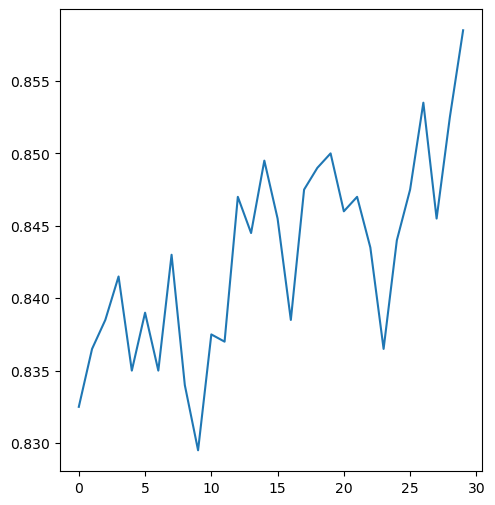

In [46]:
test_data_gen = test_validation_data_Pipeline(batch_size, img_size, 'covid xray/train_val', test_dir)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Save the model to disk and load it back
final_model.save('covid_xray_model.h5')  # Save the model
loaded_model = tf.keras.models.load_model('covid_xray_model.h5')  # Load the model

# Test the model on the test dataset and print the performance metrics
test_loss, test_accuracy = loaded_model.evaluate(test_data_gen)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Confusion matrix
y_true = []
y_pred = []

# Get true labels and predicted labels
for images, labels in test_data_gen:
    y_true.extend(labels.numpy())
    y_pred.extend(loaded_model.predict(images))

# Convert predictions to binary (0 or 1)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
